In [2]:
import numpy as np # type: ignore

def compute_vector_length(vector):
  return np.sqrt(np.sum(vector**2))

vector = np.array([1, 1, 1])
length = compute_vector_length(vector)
print(length)

1.7320508075688772


In [3]:
def compute_dot_product(vector1, vector2):
  return np.sum(vector1 * vector2)

vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])
dot_product = compute_dot_product(vector1, vector2)
print(dot_product)

32


In [4]:
def matrix_multi_vector(matrix, vector):
  return np.dot(matrix, vector)

matrix = np.array([[1, 2, 3], [4, 5, 6]])
vector = np.array([1, 2, 3])
result = matrix_multi_vector(matrix, vector)
print(result)

[14 32]


1. **Calculate the determinant of A**:
$$
\text{det}(A) = ad - bc = (-2)(-4) - (6)(8) = -40
$$
Since $\text{det}(A) \neq 0$, the matrix is invertable

$$
A^{-1} = \frac{1}{\text{det}(A)} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix} = \frac{1}{-40} \begin{pmatrix} -4 & -6 \\ -8 & -2 \end{pmatrix} =  \begin{pmatrix} 0.1 & 0.15 \\ 0.2 & 0.05 \end{pmatrix}
$$

In [5]:
def matrix_inverse(matrix):
  det_matrix = np.linalg.det(matrix)
  if det_matrix == 0:
    raise ValueError("Matrix is singular and cannot be inverted.")
  return np.linalg.inv(matrix)

matrix = np.array([[-2,6], [8, -4]])
inverse_matrix = matrix_inverse(matrix)
print(inverse_matrix)

[[0.1  0.15]
 [0.2  0.05]]


$$
\text{det}(A - \lambda I) = \begin{vmatrix}
   0.9 - \lambda & 0.2 \\
   0.1 & 0.8 - \lambda
   \end{vmatrix} = 0
$$
Solve the quadratic equation:
$$
\rightarrow \lambda _ 1 = 1, \lambda _ 2 = 0.7
$$
**Find the eigenvectors v for each eigenvalue:**
Solve $\text{det}(A - \lambda I) v = 0$:
$$
\begin{pmatrix}
   0.9 - 1 & 0.2 \\
   0.1 & 0.8 - 1
   \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = 0
→  v_1 = 2v_2
$$



In [43]:
def compute_eigenvalues_eigenvectors(matrix):
  e_values, e_vectors = np.linalg.eig(matrix)
  return e_values, e_vectors

matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
e_values, e_vectors = compute_eigenvalues_eigenvectors(matrix)
print(e_values)
print(e_vectors)

[1.  0.7]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


$$
x \cdot y = 1 + 0 + 9 + 0 = 10 \\
||x|| = \sqrt{1^2 + 2^2 + 3^2 + 4^2} = \sqrt{30} \\
||y|| = \sqrt{1^2 + 0^2 + 3^2 + 0^2} = \sqrt{10}\\
\rightarrow \text{cs}(x, y) = \frac{10}{\sqrt{30} \cdot \sqrt{10}} = \frac{\sqrt{3}}{3}
$$

In [44]:
def compute_cosine_similarity(vector1, vector2):
  dot_product = np.dot(vector1, vector2)
  norm1 = np.linalg.norm(vector1)
  norm2 = np.linalg.norm(vector2)
  return dot_product / (norm1 * norm2)

vector1 = np.array([1,2,3,4])
vector2 = np.array([1,0,3,0])
similarity = compute_cosine_similarity(vector1, vector2)
print(similarity, np.sqrt(3) / 3)

0.5773502691896257 0.5773502691896257


In [8]:
import numpy as np # type: ignore
from google.colab.patches import cv2_imshow # type: ignore
import cv2 # type: ignore

bg1_image = cv2.imread("/content/GreenBackground.png", 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread("/content/Object.png", 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread("/content/NewBackground.jpg", 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

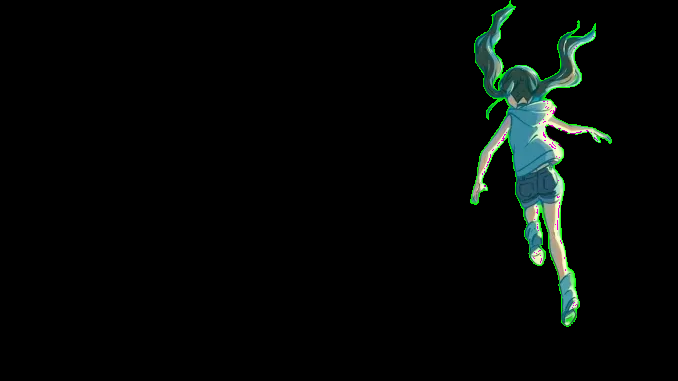

In [9]:
def compute_different(bg_img, input_img):
  return np.abs(input_img - bg_img)

diff = compute_different(bg1_image, ob_image)
cv2_imshow(diff)

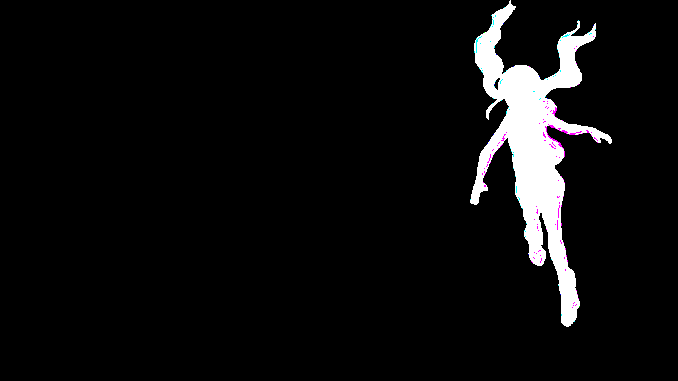

In [21]:
def compute_binary_map(diff):
  return np.where(diff > 0, 255, 0)

bin_mask = compute_binary_map(diff)
cv2_imshow(bin_mask)

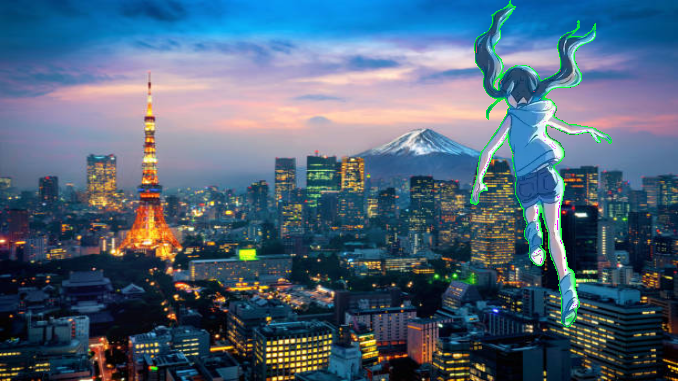

In [22]:
def replace_background(bg1_image, bg2_image, ob_image):
  diff = compute_different(
      bg1_image, ob_image
  )
  bin_mask = compute_binary_map(diff)
  return np.where(bin_mask == 255, ob_image, bg2_image)

result = replace_background(bg1_image, bg2_image, ob_image)
cv2_imshow(result)

In [24]:
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(round(result,2))

23.28


In [25]:
v1 = np.array([0, 1,-1, 2])
v2 = np.array([2, 5, 1, 0])
result =  compute_dot_product(v1, v2)
print(round(result,2))

4


In [27]:
x = np.array([[1,2], [3,4]])
k = np.array([1,2])
print("result \n", x.dot(k))

result 
 [ 5 11]


In [28]:
x = np.array([[-1, 2], [3,-4]])
k = np.array([1, 2])
print("result \n", x@k)

result 
 [ 3 -5]


In [29]:
m = np.array([[-1, 1, 1], [0,-4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)

[3 1]


In [30]:
def matrix_multi_matrix(m1, m2):
  return np.dot(m1, m2)
m1 = np.array([[0, 1, 2], [2,-3, 1]])
m2 = np.array([[1,-3],[6, 1], [0,-1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


In [31]:
m1 = np.eye(3)
m2 = np.array([[1, 1, 1],[2, 2, 2], [3, 3, 3]])
result = m1@m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [35]:
m1 = np.eye(2)
m1 = np.reshape(m1,(-1,4))[0]
m2 = np.array([[1, 1, 1, 1],[2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print(result)

[5. 5. 5. 5.]


In [37]:
m1 = np.array([[1, 2], [3, 4]])
m1 = np.reshape(m1,(-1,4), "F")[0]
m2 = np.array([[1, 1, 1, 1],[2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print(result)

[29 29 29 29]


In [39]:
def inverse_matrix(matrix):
  det = np.linalg.det(matrix)
  if det == 0:
    raise ValueError("Matrix is singular and cannot be inverted.")
  return np.linalg.inv(matrix)
m1 = np.array([[-2, 6], [8,-4]])
result = inverse_matrix(m1)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


In [40]:
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [41]:
def compute_cosine(v1, v2):
  norm1 = np.linalg.norm(v1)
  norm2 = np.linalg.norm(v2)
  return np.dot(v1, v2) / (norm1 * norm2)

x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x,y)
print(round(result, 3))

0.577
